In [1]:
from __future__ import division, print_function
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util


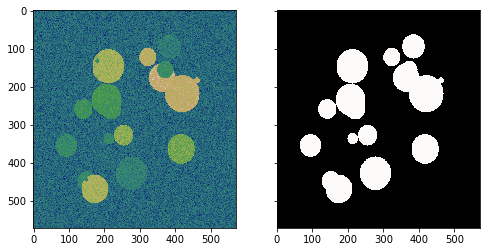

In [2]:
nx = 572
ny = 572

generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

x_test, y_test = generator(1)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
plt.show()

2017-10-10 21:23:09,593 Layers 3, features 16, filter size 3x3, pool size: 2x2
2017-10-10 21:23:13,102 Removing '/Users/cesare.chung/int/01_CODE_UNET/UNET/github/prediction'
2017-10-10 21:23:13,104 Removing '/Users/cesare.chung/int/01_CODE_UNET/UNET/github/unet_trained'
2017-10-10 21:23:13,105 Allocating '/Users/cesare.chung/int/01_CODE_UNET/UNET/github/prediction'
2017-10-10 21:23:13,106 Allocating '/Users/cesare.chung/int/01_CODE_UNET/UNET/github/unet_trained'
2017-10-10 21:23:25,426 Verification error= 81.2%, loss= 0.7328
2017-10-10 21:23:30,007 Start optimization
2017-10-10 21:23:38,207 Iter 0, Minibatch Loss= 0.6332, Training Accuracy= 0.8304, Minibatch error= 17.0%
2017-10-10 21:23:53,095 Iter 2, Minibatch Loss= 0.5662, Training Accuracy= 0.8112, Minibatch error= 18.9%
2017-10-10 21:24:07,479 Iter 4, Minibatch Loss= 0.4815, Training Accuracy= 0.8579, Minibatch error= 14.2%
2017-10-10 21:24:20,621 Iter 6, Minibatch Loss= 0.5309, Training Accuracy= 0.7924, Minibatch error= 20.8%
20

2017-10-10 21:39:52,958 Iter 128, Minibatch Loss= 0.3602, Training Accuracy= 0.8564, Minibatch error= 14.4%
2017-10-10 21:40:07,299 Iter 130, Minibatch Loss= 0.2332, Training Accuracy= 0.9281, Minibatch error= 7.2%
2017-10-10 21:40:24,214 Iter 132, Minibatch Loss= 0.1170, Training Accuracy= 0.9553, Minibatch error= 4.5%
2017-10-10 21:40:41,638 Iter 134, Minibatch Loss= 0.1145, Training Accuracy= 0.9660, Minibatch error= 3.4%
2017-10-10 21:40:58,109 Iter 136, Minibatch Loss= 0.1657, Training Accuracy= 0.9367, Minibatch error= 6.3%
2017-10-10 21:41:13,414 Iter 138, Minibatch Loss= 0.1069, Training Accuracy= 0.9566, Minibatch error= 4.3%
2017-10-10 21:41:19,389 Epoch 6, Average loss: 0.3110, learning rate: 0.1470
2017-10-10 21:41:30,210 Verification error= 6.5%, loss= 0.2083
2017-10-10 21:41:42,364 Iter 140, Minibatch Loss= 0.1969, Training Accuracy= 0.9474, Minibatch error= 5.3%
2017-10-10 21:41:56,015 Iter 142, Minibatch Loss= 0.1675, Training Accuracy= 0.9426, Minibatch error= 5.7%
201

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-10-10 21:49:28,227 Restoring parameters from ./unet_trained/model.cpkt
2017-10-10 21:49:28,567 Model restored from file: ./unet_trained/model.cpkt


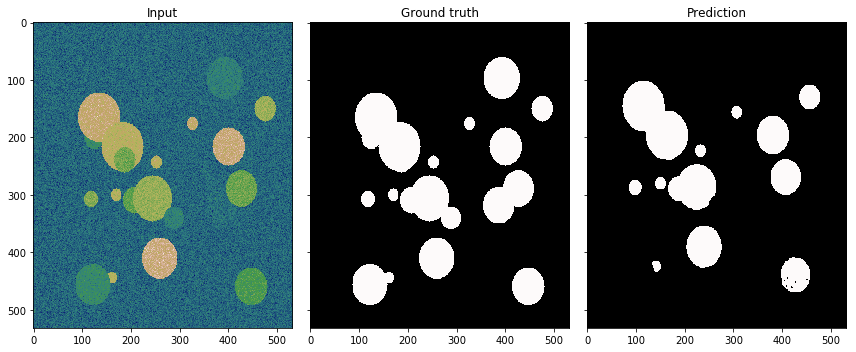

In [3]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)

x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()

fig.savefig("./docs/toy_problem.png")
